E:\gyf\Lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
E:\gyf\Lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


monthly climatology for SST: <xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[28.603327, 28.46709 , 28.329628, ..., 25.547432, 25.407318,
         25.278002],
        [28.066399, 27.915398, 27.768072, ..., 25.050482, 24.91376 ,
         24.782074],
        [27.704035, 27.550066, 27.402925, ..., 24.939613, 24.821255,
         24.694103],
        [27.733974, 27.594133, 27.458607, ..., 25.548328, 25.472971,
         25.376846],
        [27.979864, 27.871954, 27.765362, ..., 26.36988 , 26.3484  ,
         26.305618]],

       [[28.540337, 28.406334, 28.285015, ..., 26.240774, 26.166866,
         26.114462],
        [27.93303 , 27.779905, 27.645334, ..., 25.759432, 25.692144,
         25.656687],
        [27.53061 , 27.37174 , 27.229572, ..., 25.599237, 25.549782,
         25.52225 ],
        [27.580507, 27.433657, 27.294996, ..., 26.10608 , 26.09529 ,
         26.081562],
        [27.879517, 27.76656 , 27.654293, ..., 26.763283, 26.789177,
...
         24.778183],
        [28

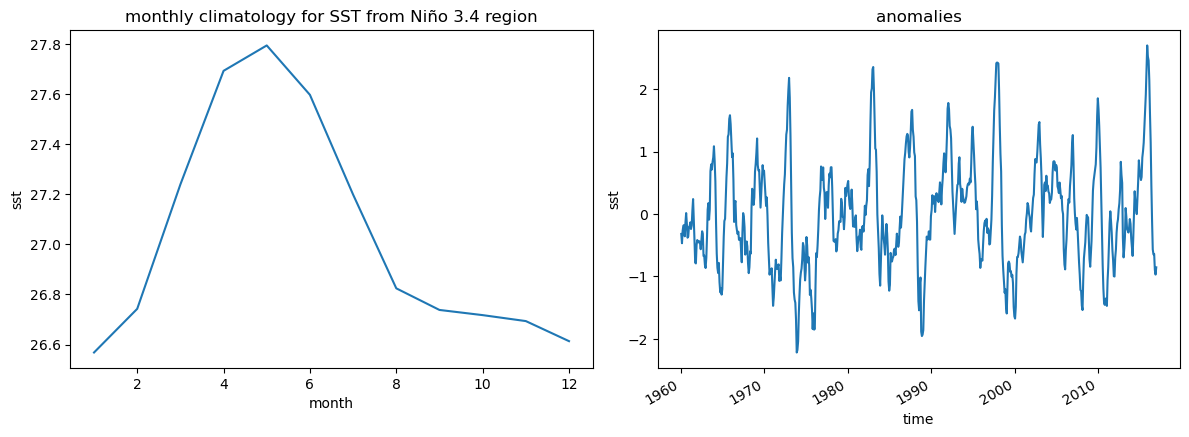

In [1]:
#1.1
import numpy as np
import netCDF4
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
ds1=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")
nino=ds1.sst.sel(lat=slice(-5,5),lon=slice(190,240))
monthly_climatology = nino.groupby(nino.time.dt.month).mean()
SST_ts=nino.groupby(nino.time.dt.month)
anomalies = SST_ts - monthly_climatology
print("monthly climatology for SST:",monthly_climatology)
print("SST Anomalies:",anomalies)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
monthly_climatology.mean(dim=['lat','lon']).plot()
plt.title('monthly climatology for SST from Niño 3.4 region')
plt.subplot(2,2,2)
anomalies.mean(dim=['lat','lon']).plot()
plt.title('anomalies')
plt.tight_layout()
plt.show()

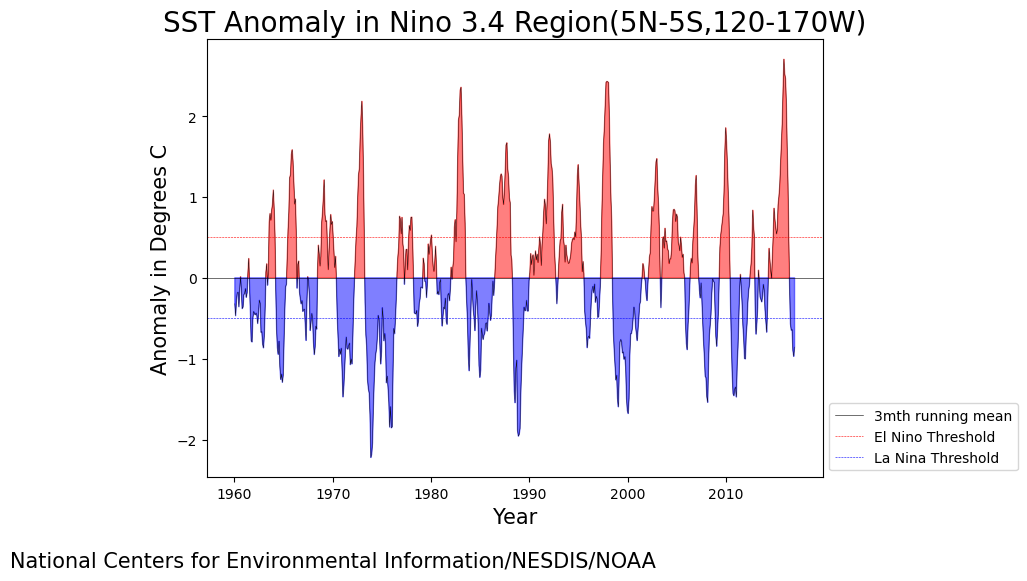

In [12]:
#1.2
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
y=anomalies.mean(dim=('lat','lon'))
x=anomalies.time.values
plt.plot(x,y,color='black',linewidth=0.3)
plt.fill_between(x,y,where=(y>=0),interpolate=True,color='red',alpha=0.5)
plt.fill_between(x,y,where=(y<0),interpolate=True,color='blue',alpha=0.5)
plt.axhline(0,color='black',linewidth=0.4,label='3mth running mean')
plt.axhline(0.5,color='red',linestyle='--',linewidth=0.4,label='El Nino Threshold')
plt.axhline(-0.5,color='blue',linestyle='--',linewidth=0.4,label='La Nina Threshold')
legend = plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Anomaly in Degrees C",fontsize=15)
plt.title("SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)",ha='center',fontsize=20)
plt.text(5,-3.5,'National Centers for Environmental Information/NESDIS/NOAA', 
             ha='center',va='center', fontsize=15)   
plt.tight_layout()
plt.show()

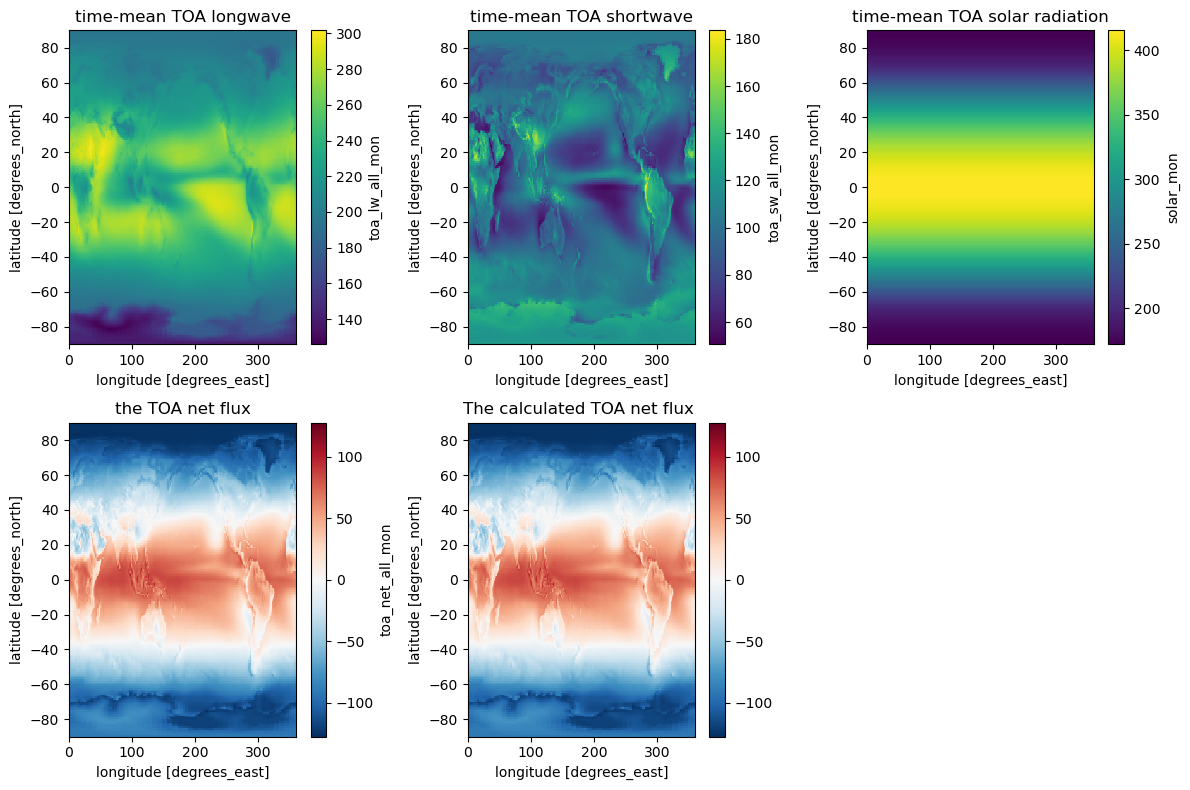

In [5]:
#2.1
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ds2=xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc",engine="netcdf4")
lw_mean=ds2['toa_lw_all_mon'].mean(dim='time')
sw_mean=ds2['toa_sw_all_mon'].mean(dim='time')
sr_mean=ds2['solar_mon'].mean(dim='time')
netflux_mean=ds2['toa_net_all_mon'].mean(dim='time')
net_sum=sr_mean-lw_mean-sw_mean

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
lw_mean.plot()
plt.title("time-mean TOA longwave")
plt.subplot(2,3,2)
sw_mean.plot()
plt.title("time-mean TOA shortwave")
plt.subplot(2,3,3)
sr_mean.plot()
plt.title("time-mean TOA solar radiation")
plt.subplot(2,3,4)
netflux_mean.plot()
plt.title("the TOA net flux")
plt.subplot(2,3,5)
net_sum.plot()
plt.title("The calculated TOA net flux ")
plt.tight_layout()
plt.show()

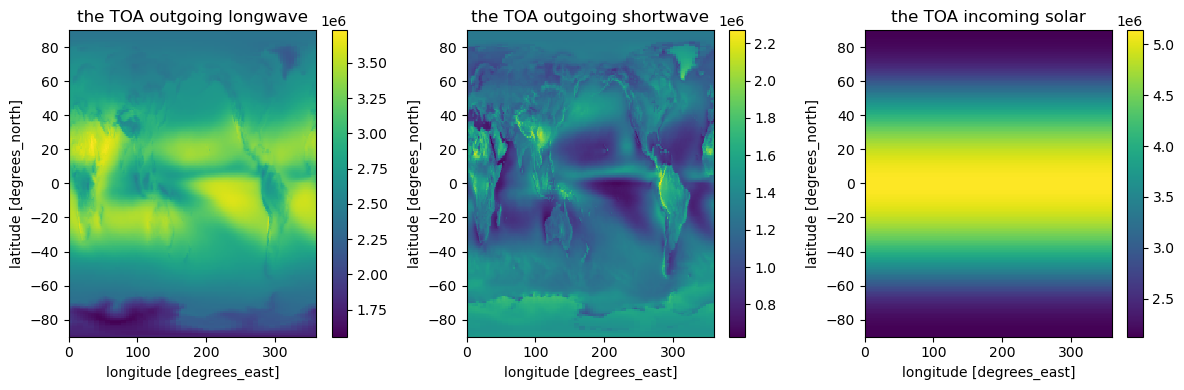

In [6]:
#2.2
lat=ds2['lat']
lon=ds2['lon']
lon_interval = np.abs(lon[1]-lon[0])
lat_interval = np.abs(lat[1]-lat[0])
lon_interval_rad = np.radians(lon_interval)
lat_interval_rad = np.radians(lat_interval)
earth_radius = 6371  #单位：km
grid_area = (earth_radius**2) * lon_interval_rad * lat_interval_rad
toa_incoming_solar = sr_mean * grid_area
toa_outgoing_longwave = lw_mean * grid_area
toa_outgoing_shortwave = sw_mean * grid_area

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
toa_outgoing_longwave.plot()
plt.title("the TOA outgoing longwave")
plt.subplot(1,3,2)
toa_outgoing_shortwave.plot()
plt.title("the TOA outgoing shortwave")
plt.subplot(1,3,3)
toa_incoming_solar.plot()
plt.title("the TOA incoming solar")
plt.tight_layout()
plt.show()

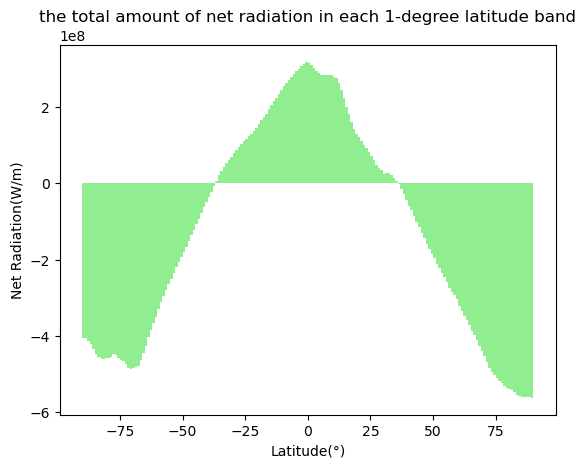

In [7]:
#2.3
net_flux=(toa_incoming_solar-toa_outgoing_longwave-toa_outgoing_shortwave).sum(dim='lon')
plt.bar(net_flux['lat'], net_flux, color='lightgreen',width=1.0)
plt.xlabel('Latitude(°)')
plt.ylabel('Net Radiation(W/m)')  
plt.title('the total amount of net radiation in each 1-degree latitude band')
plt.show()

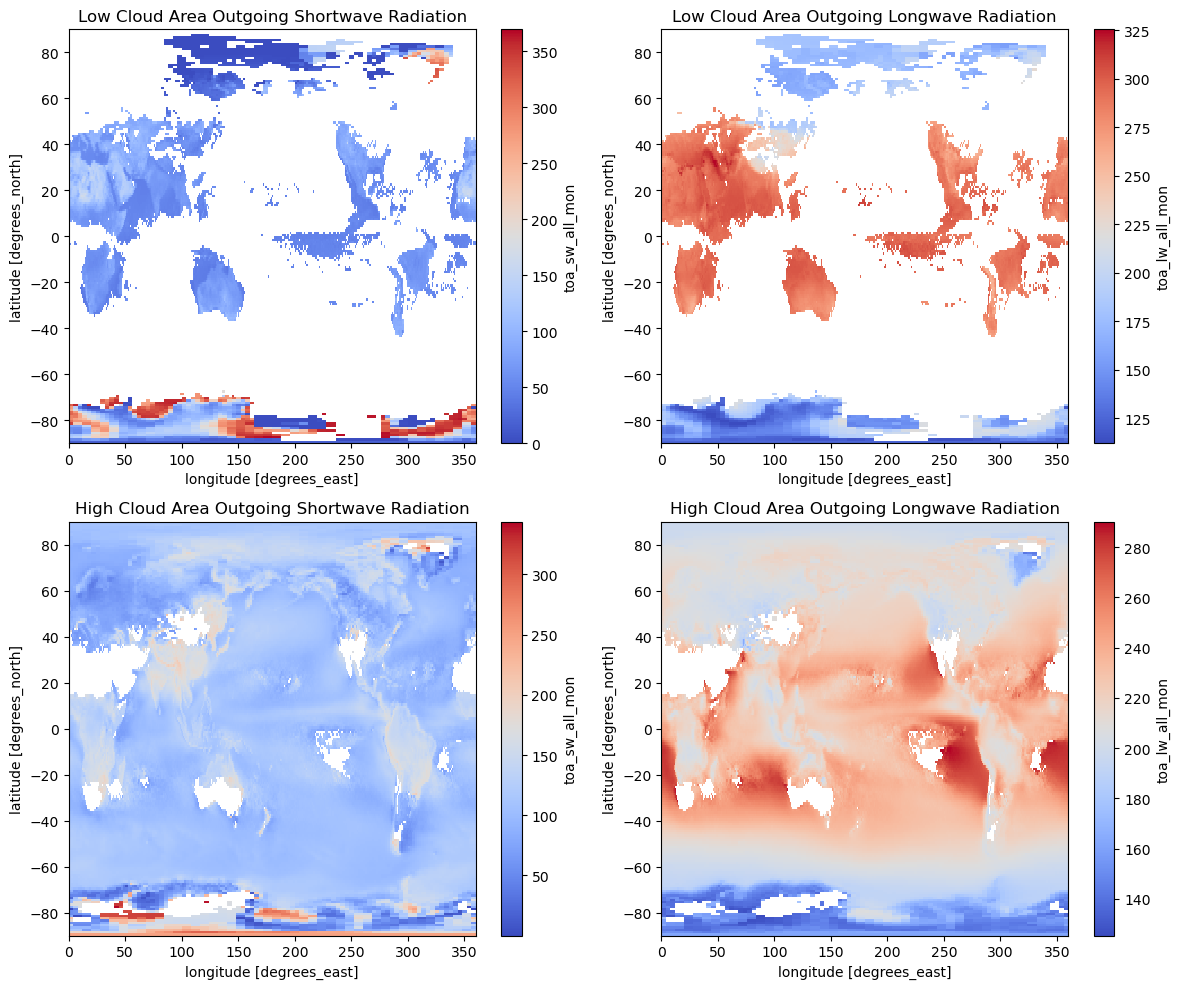

In [8]:
#2.4
sw=ds2['toa_sw_all_mon']
lw=ds2['toa_lw_all_mon']
low_cloud= ds2['cldarea_total_daynight_mon'] <= 25
high_cloud= ds2['cldarea_total_daynight_mon'] >= 75
low_cloud_out_sw = sw.where(low_cloud).mean(dim='time')
high_cloud_out_sw = sw.where(high_cloud).mean(dim='time')
low_cloud_out_lw = lw.where(low_cloud).mean(dim='time')
high_cloud_out_lw = lw.where(high_cloud).mean(dim='time')

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
low_cloud_out_sw.plot(cmap='coolwarm')
plt.title('Low Cloud Area Outgoing Shortwave Radiation')
plt.subplot(2,2,2)
low_cloud_out_lw.plot(cmap='coolwarm')
plt.title('Low Cloud Area Outgoing Longwave Radiation')

plt.subplot(2,2,3)
high_cloud_out_sw.plot(cmap='coolwarm')
plt.title('High Cloud Area Outgoing Shortwave Radiation')
plt.subplot(2,2,4)
high_cloud_out_lw.plot(cmap='coolwarm')
plt.title('High Cloud Area Outgoing Longwave Radiation')
plt.tight_layout()
plt.show()

In [9]:
#2.5
low_cloud_out_sw_global=low_cloud_out_sw.mean(dim=('lon','lat')).item()
high_cloud_out_sw_global=high_cloud_out_sw.mean(dim=('lon','lat')).item()
low_cloud_out_lw_global=low_cloud_out_lw.mean(dim=('lon','lat')).item()
high_cloud_out_lw_global=high_cloud_out_lw.mean(dim=('lon','lat')).item()
print('the global mean values of shortwave radiation in low cloud regions:')
print(low_cloud_out_sw_global,'W/m^2')
print('the global mean values of shortwave radiation in high cloud regions:')
print(high_cloud_out_sw_global,'W/m^2')
print('the global mean values of shortwave radiation in low cloud regions:')
print(low_cloud_out_lw_global,'W/m^2')
print('the global mean values of shortwave radiation in high cloud regions:')
print(high_cloud_out_lw_global,'W/m^2')

the global mean values of shortwave radiation in low cloud regions:
88.81645202636719 W/m^2
the global mean values of shortwave radiation in high cloud regions:
114.74327850341797 W/m^2
the global mean values of shortwave radiation in low cloud regions:
233.0670166015625 W/m^2
the global mean values of shortwave radiation in high cloud regions:
215.3734893798828 W/m^2


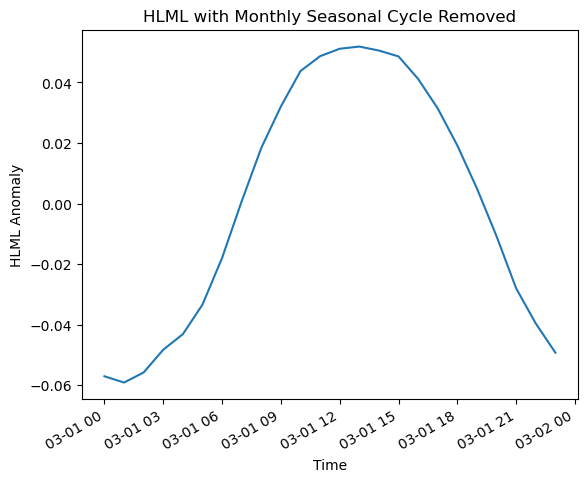

In [10]:
#3.1
import numpy as np
import netCDF4
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
ds3=xr.open_dataset("MERRA2_400.instU_2d_lfo_Nx.201503.nc4",engine="netcdf4")
monthly_mean = ds3['HLML'].groupby('time.month').mean(dim='time')
anomaly = ds3['HLML'].groupby('time.month') - monthly_mean
anomaly.mean(dim=['lon', 'lat']).plot()
plt.title('HLML with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('HLML Anomaly')
plt.show()

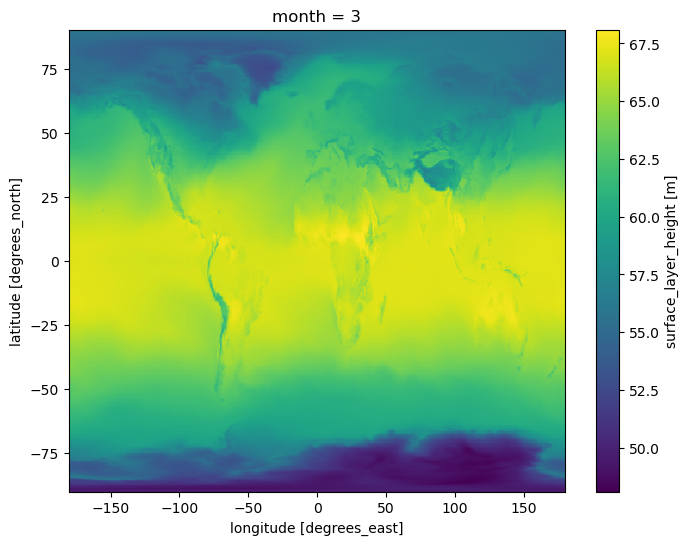

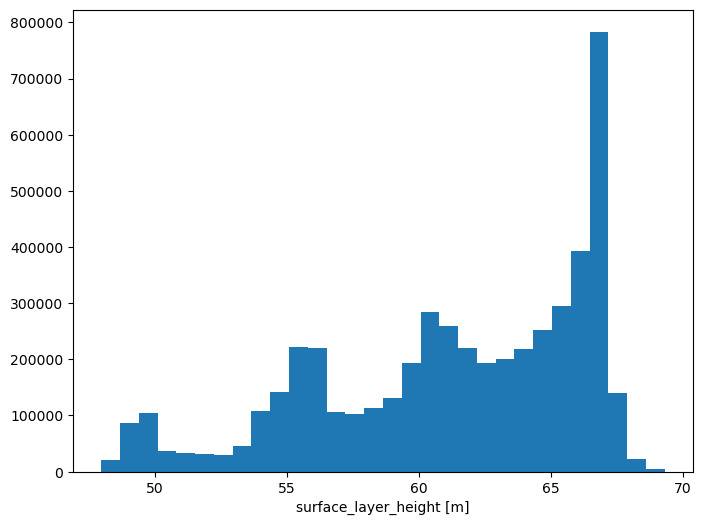

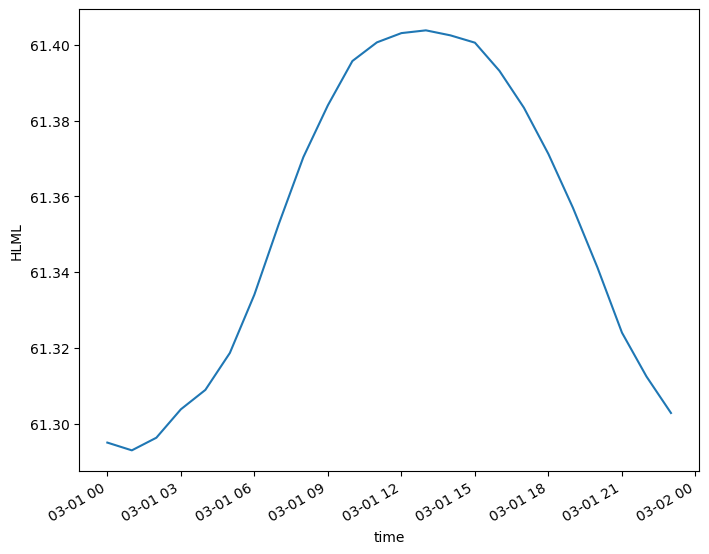

C:\Users\a\AppData\Local\Temp\ipykernel_14792\2378781572.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ds3['HLML'].values,ds3['PS'].values,c='blue',cmap='Reds',


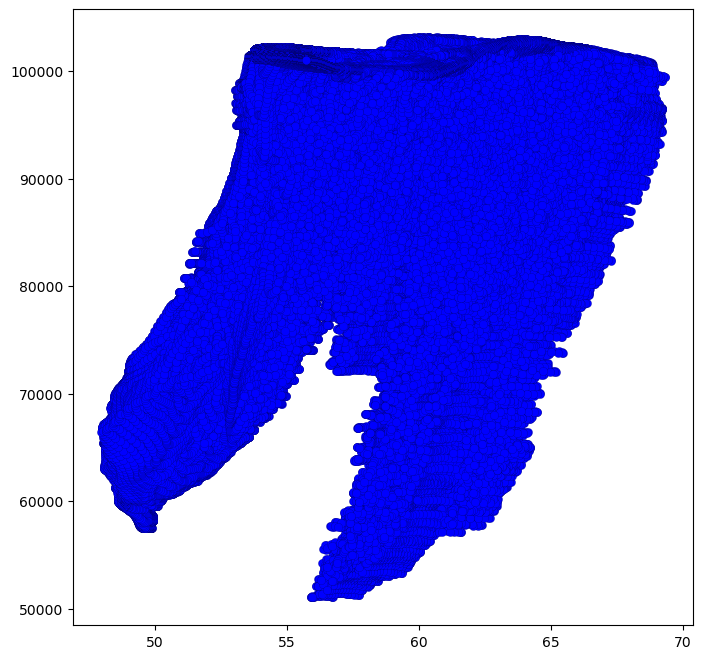

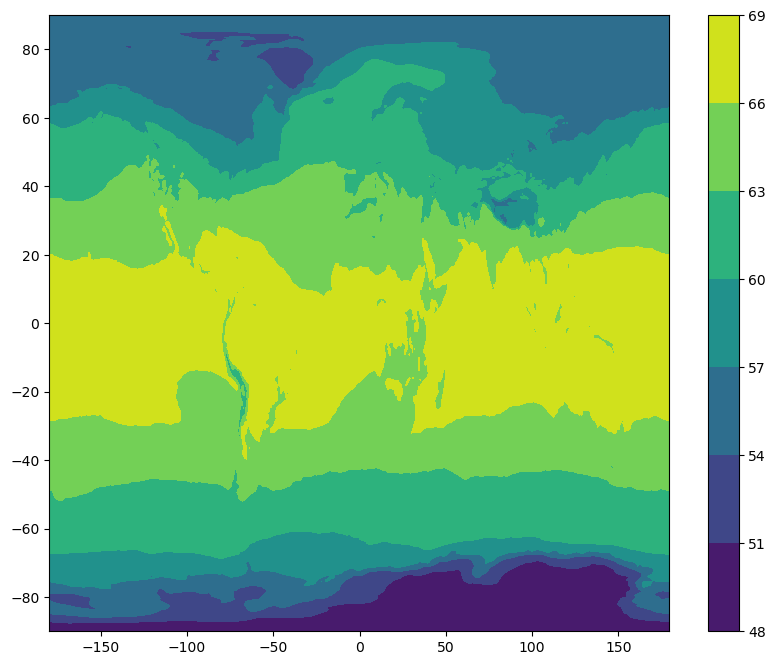

In [10]:
#3.2
import numpy as np
import netCDF4
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
ds3=xr.open_dataset("MERRA2_400.instU_2d_lfo_Nx.201503.nc4",engine="netcdf4")
plt.figure(figsize=(8, 6))
ds3['HLML'].groupby('time.month').mean().plot()
plt.show()

plt.figure(figsize=(8, 6))
ds3['HLML'].plot.hist(bins=30)
plt.show()

plt.figure(figsize=(8, 6))
ds3['HLML'].mean(dim=['lon','lat']).plot()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(ds3['HLML'].values,ds3['PS'].values,c='blue',cmap='Reds', 
             edgecolors='black', linewidths=0.1)
plt.show()

plt.figure(figsize=(10, 8))
x = ds3['lon'].values
y = ds3['lat'].values
z = ds3['HLML'].values
X, Y = np.meshgrid(x, y)
Z = z[0,:,:]
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()